In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation

In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.training.trainer import Trainer

import numpy as np
import torch
from torch.utils.data import DataLoader

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epochs:   1%|          | 1/128 [00:00<01:52,  1.13it/s]

Epoch 1/128 | Train Loss: 10912.8748 | Val Loss: 4687.2218


Epochs:   2%|▏         | 2/128 [00:01<01:31,  1.38it/s]

Epoch 2/128 | Train Loss: 2579.0124 | Val Loss: 851.1322


Epochs:   2%|▏         | 3/128 [00:02<01:28,  1.42it/s]

Epoch 3/128 | Train Loss: 610.9625 | Val Loss: 517.4394


Epochs:   3%|▎         | 4/128 [00:02<01:20,  1.54it/s]

Epoch 4/128 | Train Loss: 431.6517 | Val Loss: 357.6881


Epochs:   4%|▍         | 5/128 [00:03<01:16,  1.61it/s]

Epoch 5/128 | Train Loss: 333.1706 | Val Loss: 286.3703


Epochs:   5%|▍         | 6/128 [00:03<01:14,  1.63it/s]

Epoch 6/128 | Train Loss: 289.9038 | Val Loss: 274.4968


Epochs:   5%|▌         | 7/128 [00:04<01:13,  1.65it/s]

Epoch 7/128 | Train Loss: 283.6336 | Val Loss: 294.9256


Epochs:   6%|▋         | 8/128 [00:05<01:11,  1.68it/s]

Epoch 8/128 | Train Loss: 246.5563 | Val Loss: 276.0609


Epochs:   7%|▋         | 9/128 [00:05<01:10,  1.69it/s]

Epoch 9/128 | Train Loss: 209.1582 | Val Loss: 303.0010


Epochs:   8%|▊         | 10/128 [00:06<01:09,  1.71it/s]

Epoch 10/128 | Train Loss: 320.7696 | Val Loss: 303.5310


Epochs:   9%|▊         | 11/128 [00:06<01:08,  1.72it/s]

Epoch 11/128 | Train Loss: 208.6664 | Val Loss: 185.5554


Epochs:   9%|▉         | 12/128 [00:07<01:07,  1.72it/s]

Epoch 12/128 | Train Loss: 119.4372 | Val Loss: 97.6510


Epochs:  10%|█         | 13/128 [00:07<01:06,  1.73it/s]

Epoch 13/128 | Train Loss: 95.2912 | Val Loss: 88.4068


Epochs:  11%|█         | 14/128 [00:08<01:05,  1.74it/s]

Epoch 14/128 | Train Loss: 85.3436 | Val Loss: 83.2368


Epochs:  12%|█▏        | 15/128 [00:09<01:05,  1.72it/s]

Epoch 15/128 | Train Loss: 83.5481 | Val Loss: 91.6813
Epoch 16/128 | Train Loss: 102.0404 | Val Loss: 123.0556


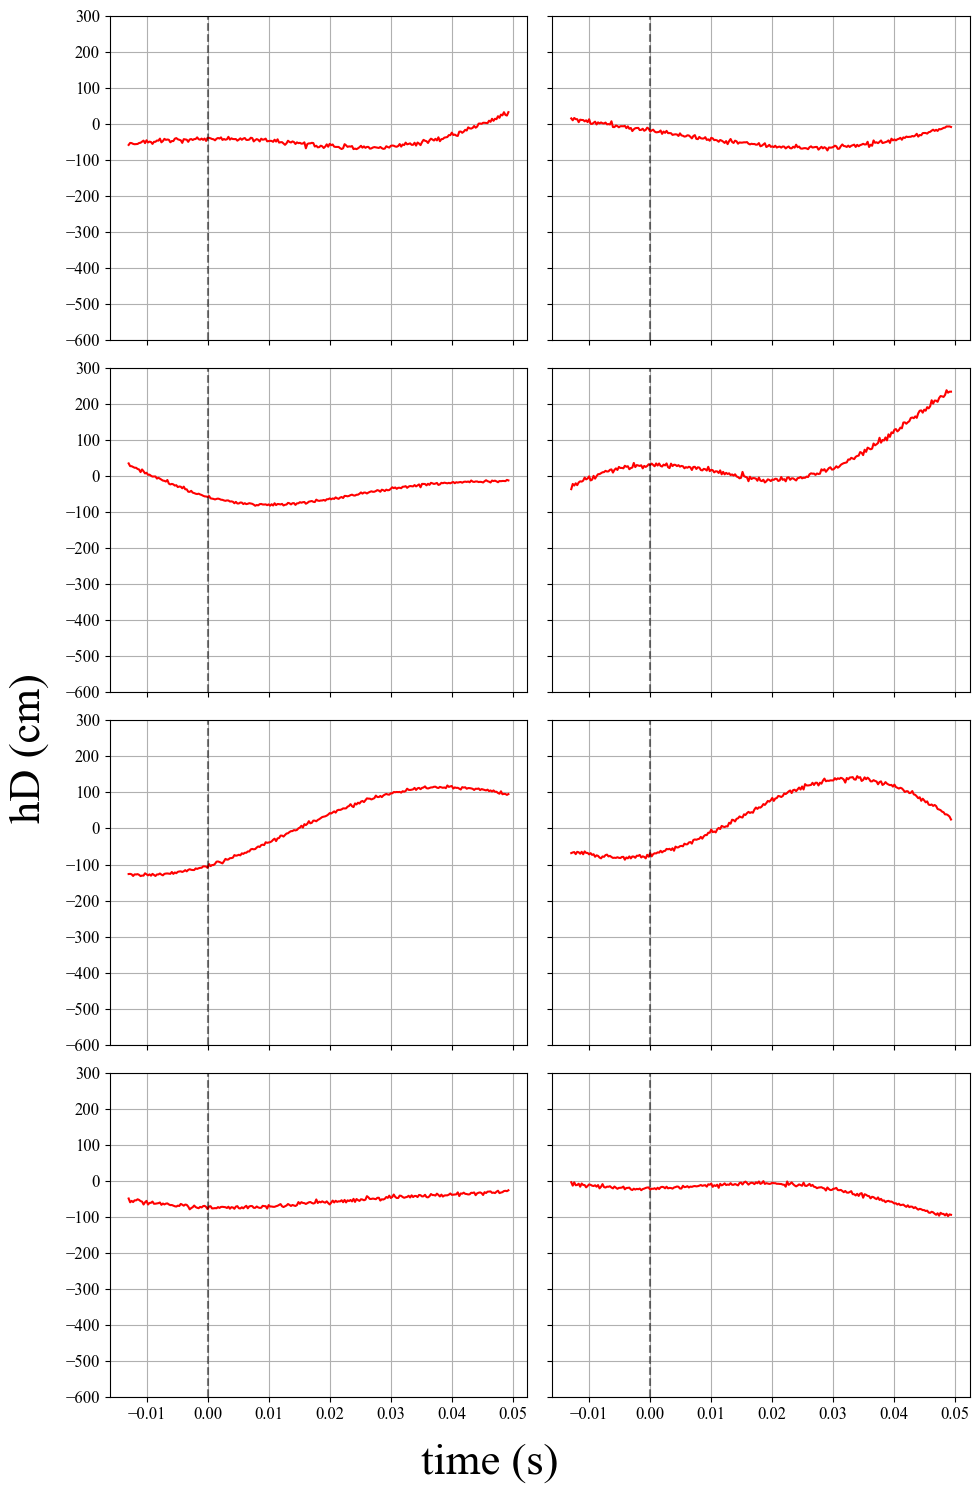

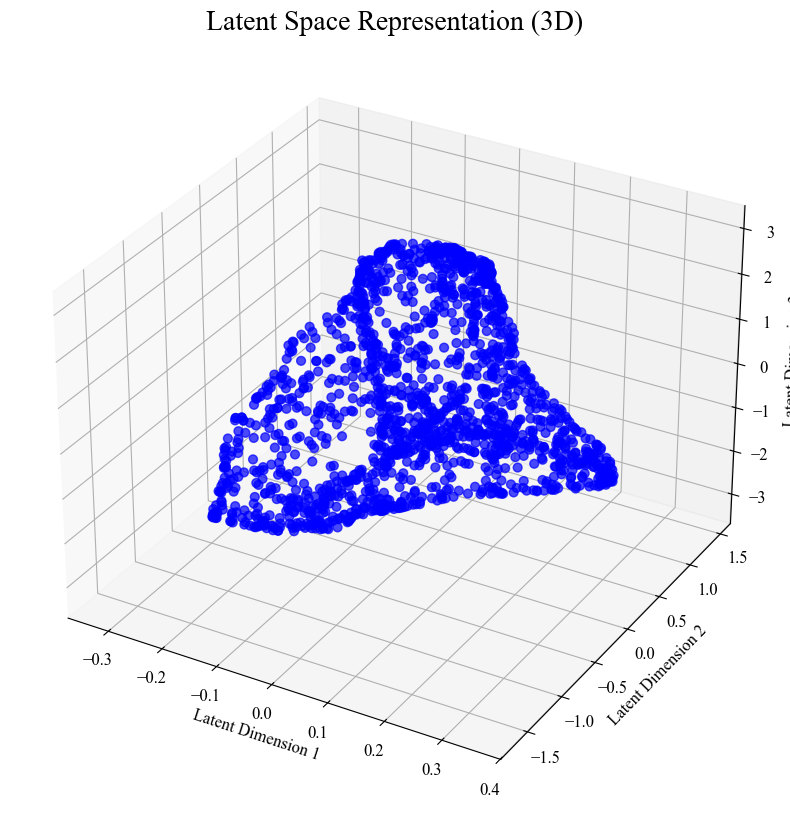

Epochs:  13%|█▎        | 17/128 [00:10<01:19,  1.40it/s]

Epoch 17/128 | Train Loss: 100.6772 | Val Loss: 100.3372


Epochs:  14%|█▍        | 18/128 [00:11<01:15,  1.46it/s]

Epoch 18/128 | Train Loss: 94.3945 | Val Loss: 82.5538


Epochs:  15%|█▍        | 19/128 [00:12<01:11,  1.53it/s]

Epoch 19/128 | Train Loss: 86.7978 | Val Loss: 100.7976


Epochs:  16%|█▌        | 20/128 [00:12<01:07,  1.59it/s]

Epoch 20/128 | Train Loss: 116.5608 | Val Loss: 111.7216


Epochs:  16%|█▋        | 21/128 [00:13<01:06,  1.62it/s]

Epoch 21/128 | Train Loss: 120.9217 | Val Loss: 118.6662


Epochs:  17%|█▋        | 22/128 [00:13<01:05,  1.62it/s]

Epoch 22/128 | Train Loss: 114.3723 | Val Loss: 137.6889


Epochs:  18%|█▊        | 23/128 [00:14<01:04,  1.64it/s]

Epoch 23/128 | Train Loss: 96.6156 | Val Loss: 105.8963


Epochs:  19%|█▉        | 24/128 [00:15<01:02,  1.67it/s]

Epoch 24/128 | Train Loss: 90.0374 | Val Loss: 101.6793


Epochs:  20%|█▉        | 25/128 [00:15<01:01,  1.67it/s]

Epoch 25/128 | Train Loss: 91.4207 | Val Loss: 113.6106


Epochs:  20%|██        | 26/128 [00:16<01:01,  1.67it/s]

Epoch 26/128 | Train Loss: 89.8060 | Val Loss: 78.8100


Epochs:  21%|██        | 27/128 [00:16<01:00,  1.67it/s]

Epoch 27/128 | Train Loss: 76.2659 | Val Loss: 66.9127


Epochs:  22%|██▏       | 28/128 [00:17<01:02,  1.61it/s]

Epoch 28/128 | Train Loss: 72.4399 | Val Loss: 73.4119


Epochs:  23%|██▎       | 29/128 [00:18<01:00,  1.63it/s]

Epoch 29/128 | Train Loss: 70.4103 | Val Loss: 83.2602


Epochs:  23%|██▎       | 30/128 [00:18<01:00,  1.62it/s]

Epoch 30/128 | Train Loss: 98.9620 | Val Loss: 107.7648


Epochs:  24%|██▍       | 31/128 [00:19<00:59,  1.64it/s]

Epoch 31/128 | Train Loss: 89.7238 | Val Loss: 151.2109
Epoch 32/128 | Train Loss: 103.5941 | Val Loss: 76.2319


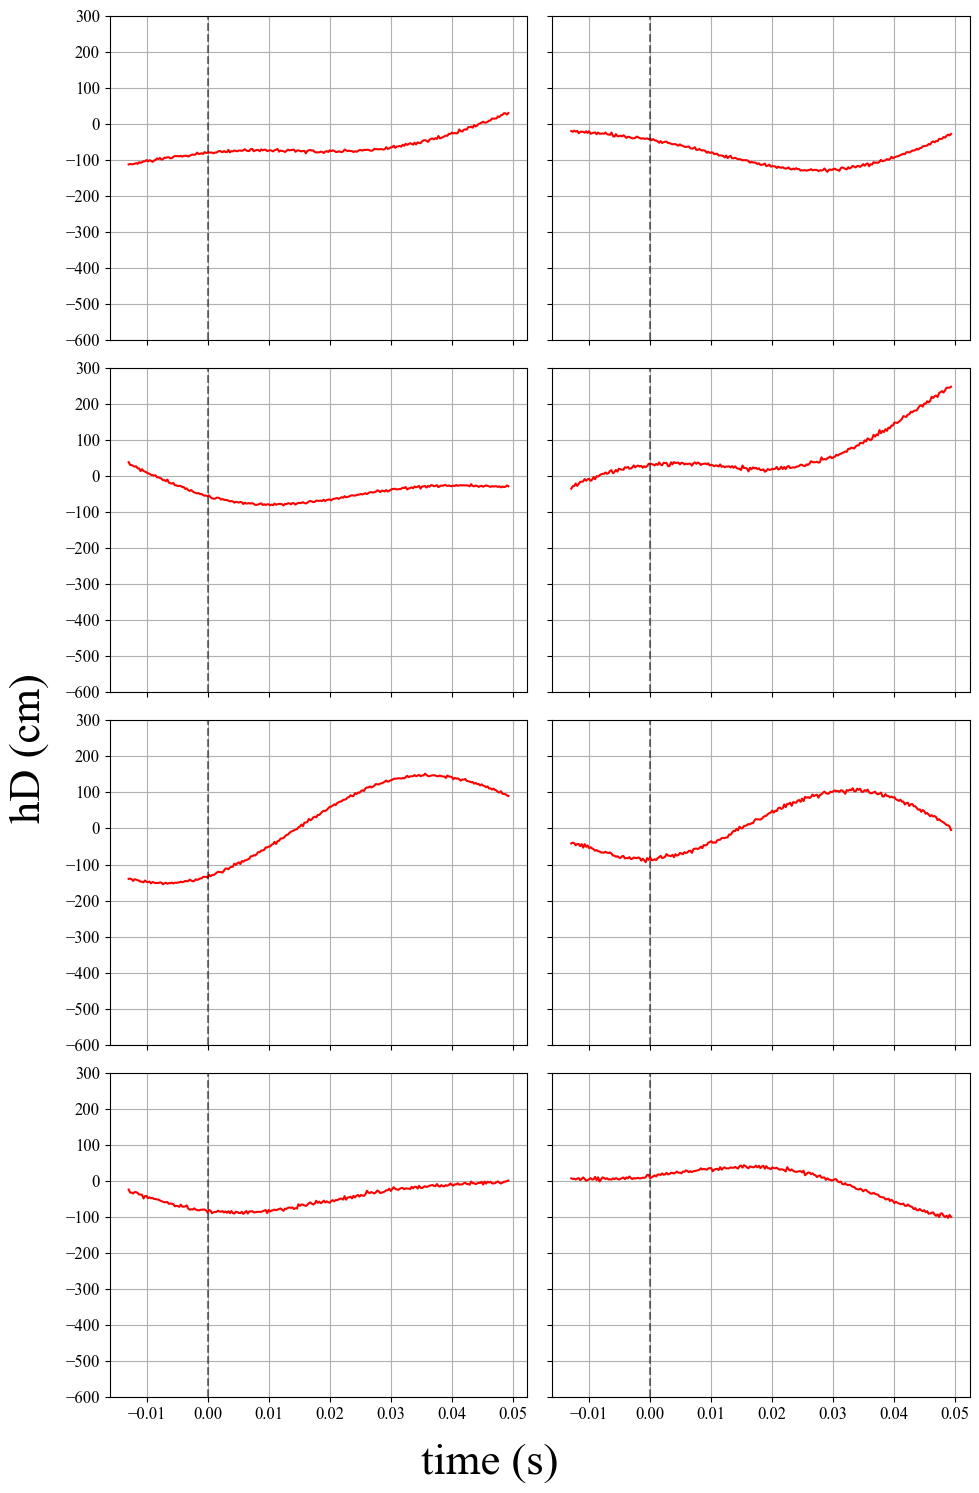

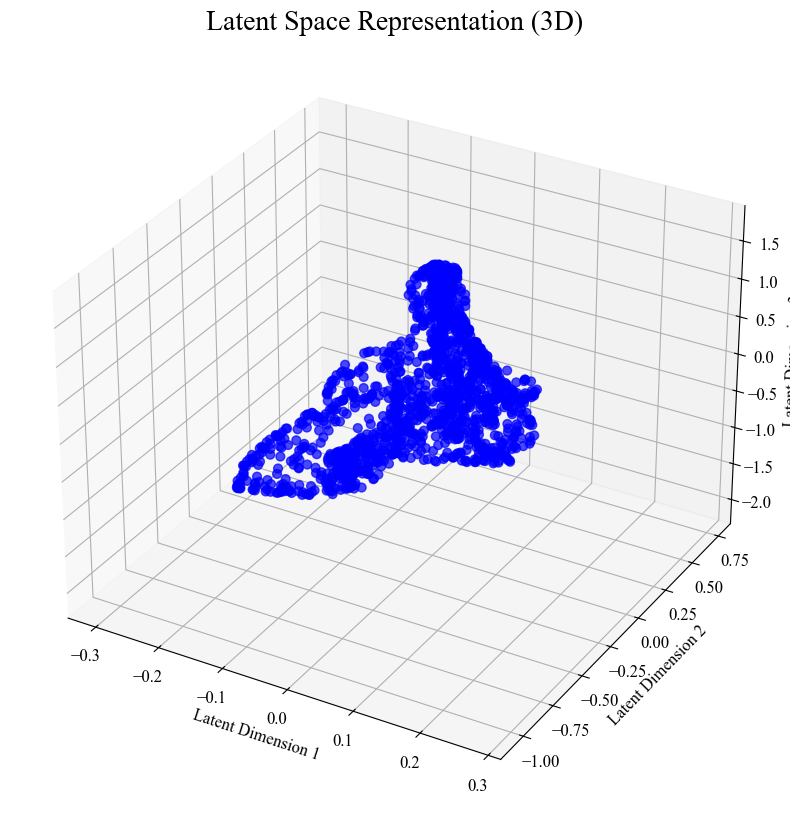

Epochs:  26%|██▌       | 33/128 [00:21<01:08,  1.40it/s]

Epoch 33/128 | Train Loss: 94.3551 | Val Loss: 165.0645


Epochs:  27%|██▋       | 34/128 [00:21<01:04,  1.46it/s]

Epoch 34/128 | Train Loss: 121.9922 | Val Loss: 126.3183


Epochs:  27%|██▋       | 35/128 [00:22<01:00,  1.53it/s]

Epoch 35/128 | Train Loss: 86.9754 | Val Loss: 85.5819


Epochs:  28%|██▊       | 36/128 [00:22<00:58,  1.56it/s]

Epoch 36/128 | Train Loss: 99.3076 | Val Loss: 96.6828


Epochs:  29%|██▉       | 37/128 [00:23<00:59,  1.54it/s]

Epoch 37/128 | Train Loss: 130.4221 | Val Loss: 235.8686


Epochs:  30%|██▉       | 38/128 [00:24<00:58,  1.55it/s]

Epoch 38/128 | Train Loss: 154.3179 | Val Loss: 78.2835


Epochs:  30%|███       | 39/128 [00:24<00:56,  1.57it/s]

Epoch 39/128 | Train Loss: 79.4205 | Val Loss: 67.9787


Epochs:  31%|███▏      | 40/128 [00:25<00:55,  1.58it/s]

Epoch 40/128 | Train Loss: 70.9417 | Val Loss: 78.4004


Epochs:  32%|███▏      | 41/128 [00:25<00:54,  1.60it/s]

Epoch 41/128 | Train Loss: 75.8326 | Val Loss: 134.3933


Epochs:  33%|███▎      | 42/128 [00:26<00:52,  1.63it/s]

Epoch 42/128 | Train Loss: 125.6149 | Val Loss: 133.2243


Epochs:  34%|███▎      | 43/128 [00:27<00:51,  1.63it/s]

Epoch 43/128 | Train Loss: 91.1731 | Val Loss: 90.6337


Epochs:  34%|███▍      | 44/128 [00:27<00:50,  1.65it/s]

Epoch 44/128 | Train Loss: 74.5754 | Val Loss: 79.3727


Epochs:  35%|███▌      | 45/128 [00:28<00:51,  1.62it/s]

Epoch 45/128 | Train Loss: 82.5466 | Val Loss: 130.7525


Epochs:  36%|███▌      | 46/128 [00:29<00:51,  1.60it/s]

Epoch 46/128 | Train Loss: 70.6406 | Val Loss: 57.5352


Epochs:  37%|███▋      | 47/128 [00:29<00:49,  1.63it/s]

Epoch 47/128 | Train Loss: 52.6667 | Val Loss: 46.5014
Epoch 48/128 | Train Loss: 49.2773 | Val Loss: 61.8902


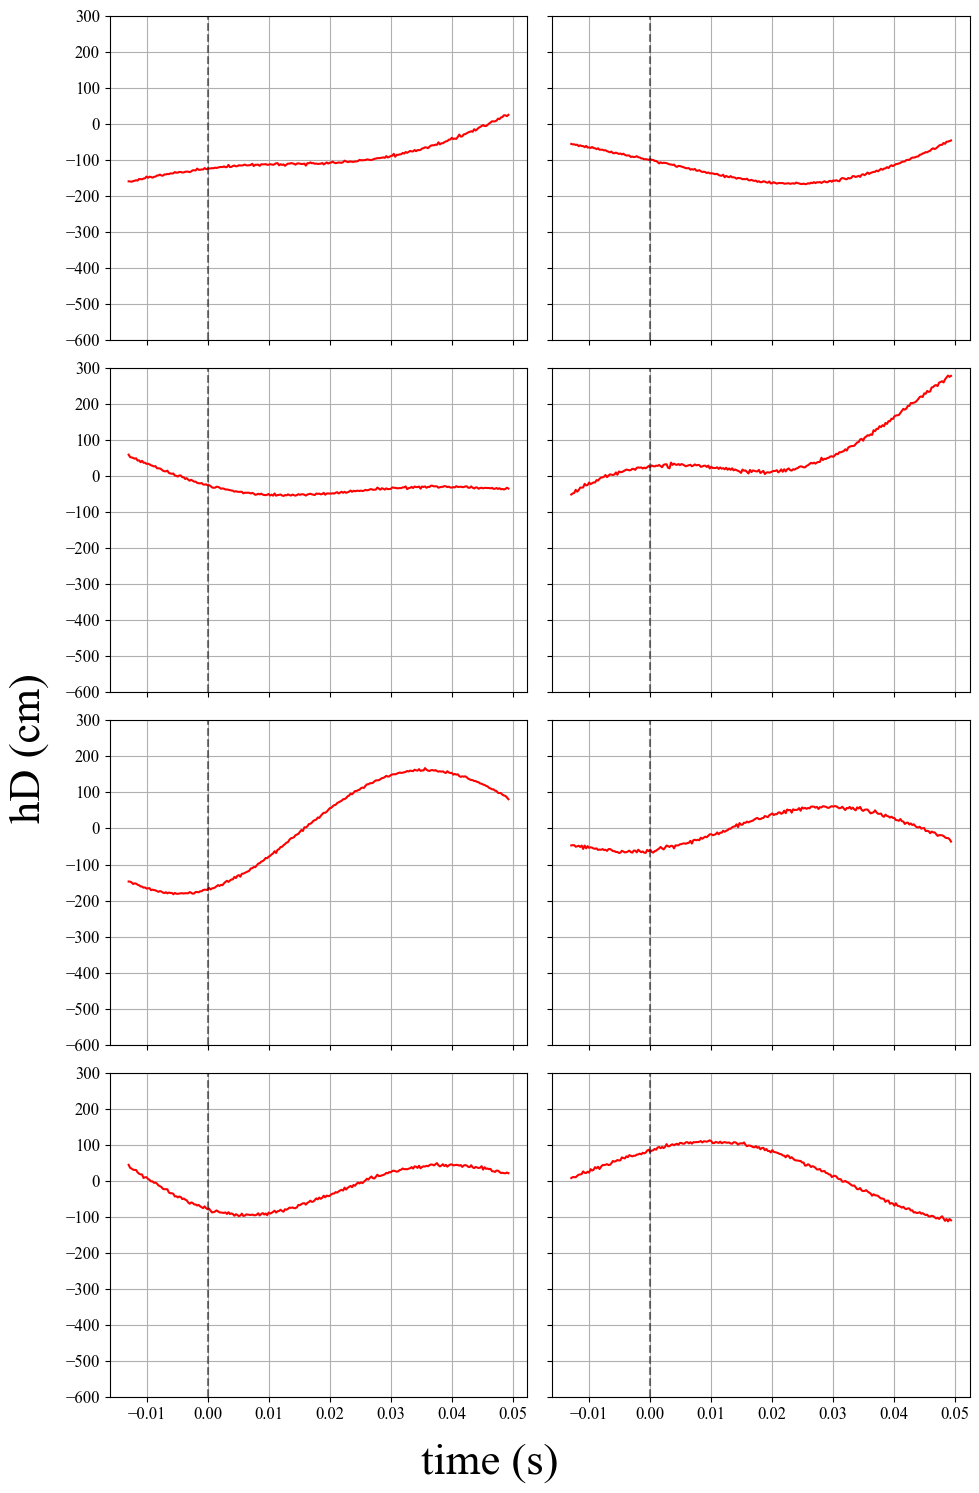

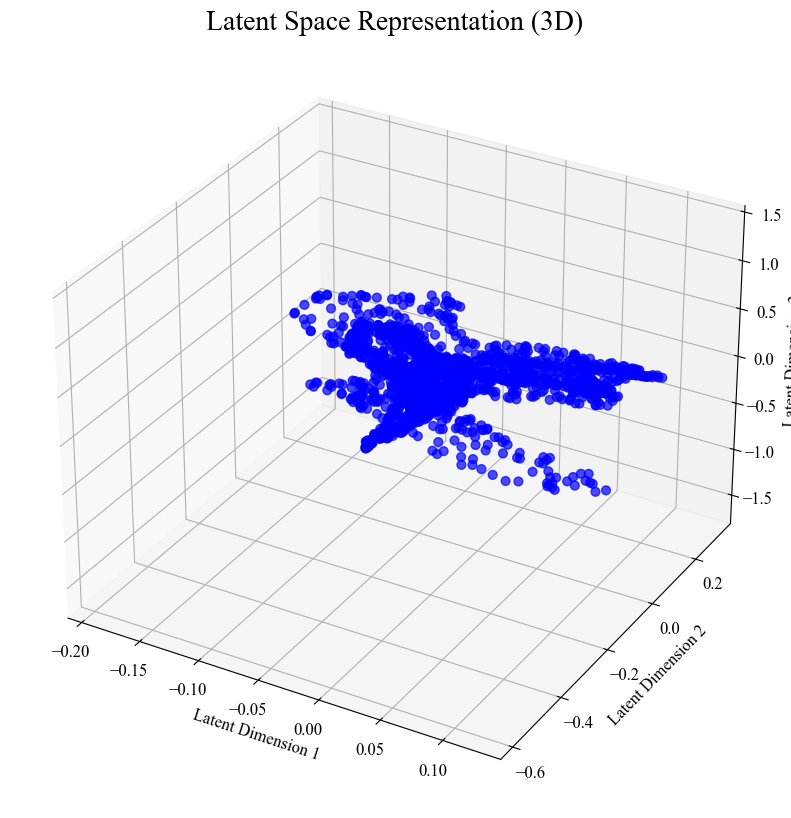

Epochs:  38%|███▊      | 49/128 [00:31<00:56,  1.40it/s]

Epoch 49/128 | Train Loss: 60.2593 | Val Loss: 90.7766


Epochs:  39%|███▉      | 50/128 [00:31<00:52,  1.50it/s]

Epoch 50/128 | Train Loss: 93.8528 | Val Loss: 109.3524


Epochs:  40%|███▉      | 51/128 [00:32<00:48,  1.58it/s]

Epoch 51/128 | Train Loss: 73.0499 | Val Loss: 98.1617


Epochs:  41%|████      | 52/128 [00:33<00:46,  1.64it/s]

Epoch 52/128 | Train Loss: 72.8993 | Val Loss: 59.4891


Epochs:  41%|████▏     | 53/128 [00:33<00:45,  1.66it/s]

Epoch 53/128 | Train Loss: 53.8899 | Val Loss: 50.8550


Epochs:  42%|████▏     | 54/128 [00:34<00:44,  1.65it/s]

Epoch 54/128 | Train Loss: 65.6592 | Val Loss: 68.3708


Epochs:  43%|████▎     | 55/128 [00:34<00:45,  1.60it/s]

Epoch 55/128 | Train Loss: 72.7712 | Val Loss: 91.8528


Epochs:  44%|████▍     | 56/128 [00:35<00:44,  1.63it/s]

Epoch 56/128 | Train Loss: 76.7910 | Val Loss: 117.5389


Epochs:  45%|████▍     | 57/128 [00:36<00:41,  1.70it/s]

Epoch 57/128 | Train Loss: 76.0709 | Val Loss: 104.7163


Epochs:  45%|████▌     | 58/128 [00:36<00:39,  1.75it/s]

Epoch 58/128 | Train Loss: 73.3571 | Val Loss: 86.6708


Epochs:  46%|████▌     | 59/128 [00:37<00:38,  1.79it/s]

Epoch 59/128 | Train Loss: 72.2670 | Val Loss: 103.0292


Epochs:  47%|████▋     | 60/128 [00:37<00:37,  1.82it/s]

Epoch 60/128 | Train Loss: 84.6141 | Val Loss: 57.9085


Epochs:  48%|████▊     | 61/128 [00:38<00:38,  1.76it/s]

Epoch 61/128 | Train Loss: 49.2478 | Val Loss: 44.9191


Epochs:  48%|████▊     | 62/128 [00:38<00:36,  1.80it/s]

Epoch 62/128 | Train Loss: 45.0116 | Val Loss: 61.1634


Epochs:  49%|████▉     | 63/128 [00:39<00:35,  1.82it/s]

Epoch 63/128 | Train Loss: 47.4926 | Val Loss: 53.7313
Epoch 64/128 | Train Loss: 55.4631 | Val Loss: 61.0613


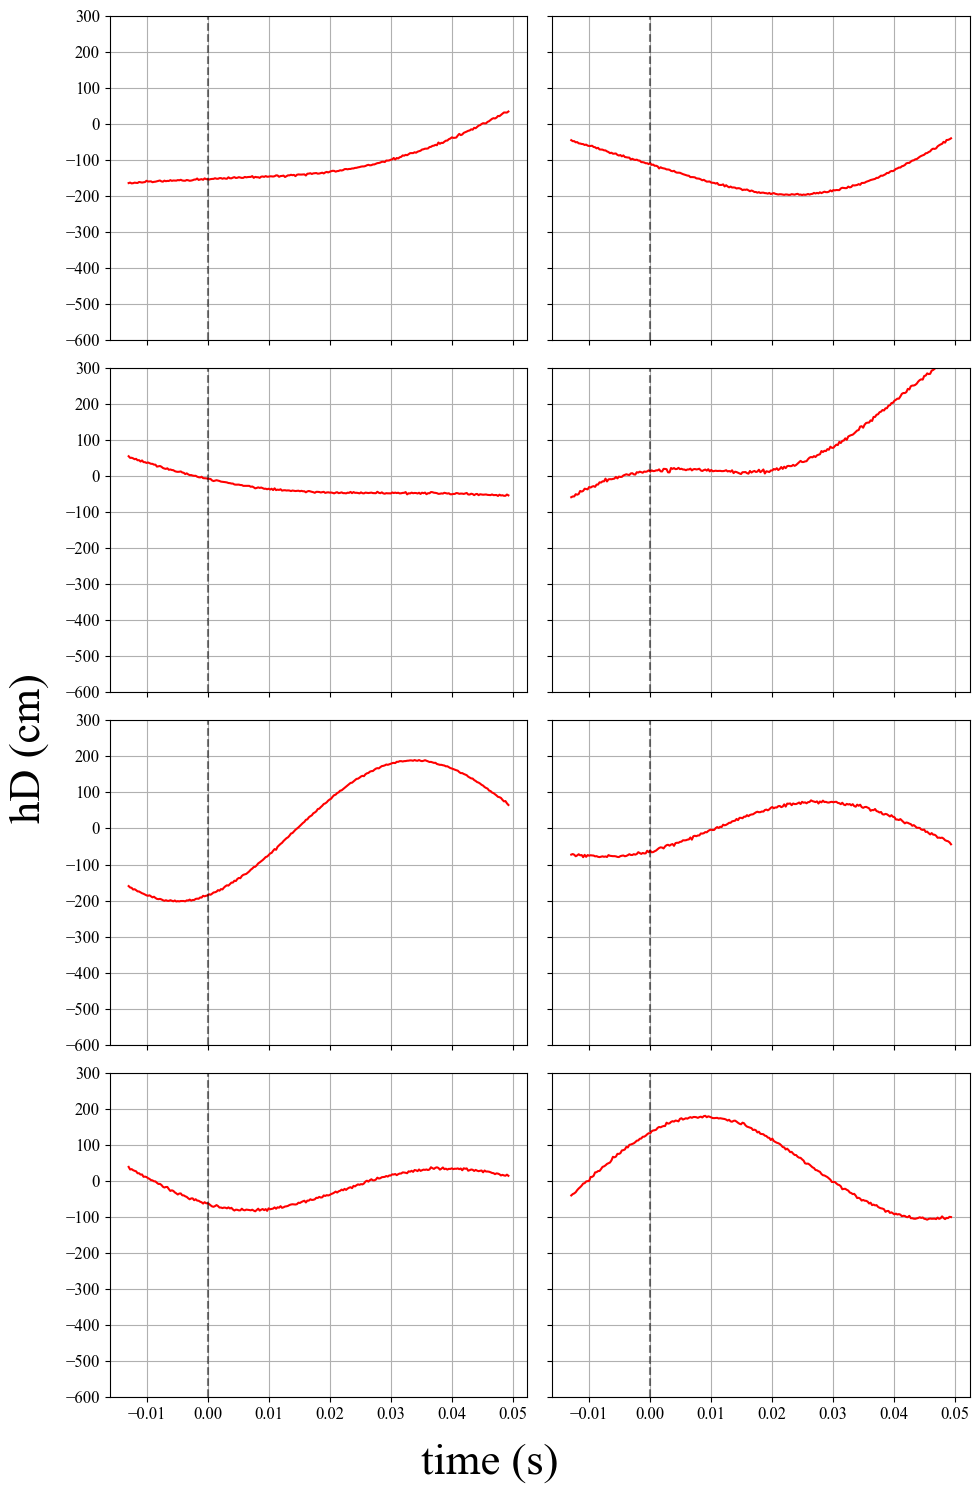

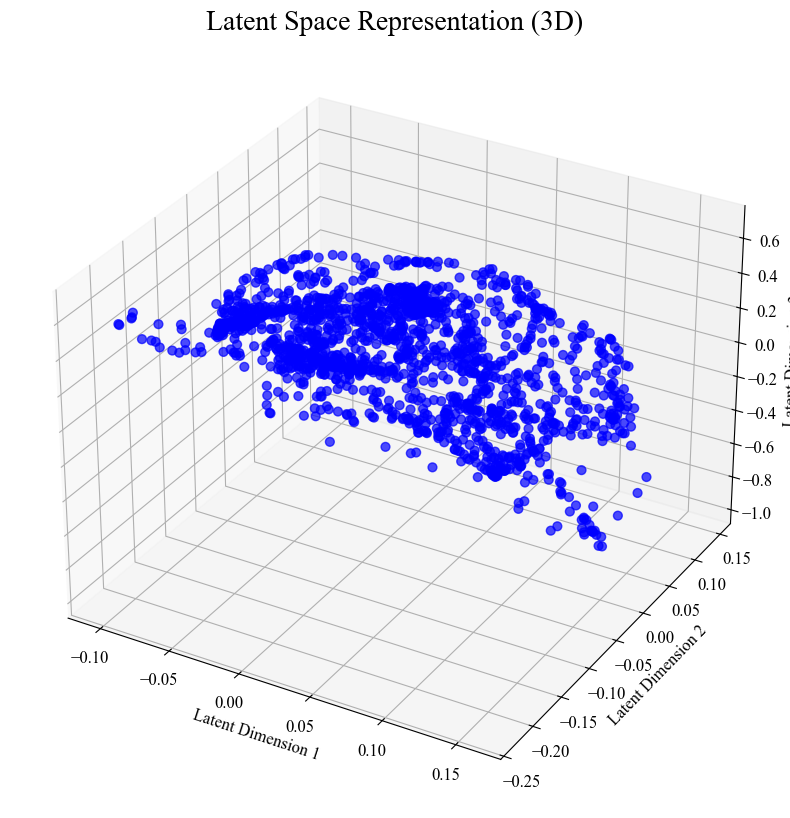

Epochs:  51%|█████     | 65/128 [00:40<00:40,  1.57it/s]

Epoch 65/128 | Train Loss: 52.7918 | Val Loss: 92.8260


Epochs:  52%|█████▏    | 66/128 [00:41<00:37,  1.66it/s]

Epoch 66/128 | Train Loss: 82.2462 | Val Loss: 51.2721


Epochs:  52%|█████▏    | 67/128 [00:41<00:35,  1.72it/s]

Epoch 67/128 | Train Loss: 43.5713 | Val Loss: 56.4371


Epochs:  53%|█████▎    | 68/128 [00:42<00:33,  1.77it/s]

Epoch 68/128 | Train Loss: 47.4666 | Val Loss: 44.4758


Epochs:  54%|█████▍    | 69/128 [00:42<00:32,  1.81it/s]

Epoch 69/128 | Train Loss: 45.6229 | Val Loss: 105.8555


Epochs:  55%|█████▍    | 70/128 [00:43<00:31,  1.83it/s]

Epoch 70/128 | Train Loss: 70.0497 | Val Loss: 54.6571


Epochs:  55%|█████▌    | 71/128 [00:43<00:30,  1.84it/s]

Epoch 71/128 | Train Loss: 66.0729 | Val Loss: 73.5108


Epochs:  56%|█████▋    | 72/128 [00:44<00:30,  1.85it/s]

Epoch 72/128 | Train Loss: 52.1331 | Val Loss: 43.4879


Epochs:  57%|█████▋    | 73/128 [00:45<00:30,  1.77it/s]

Epoch 73/128 | Train Loss: 52.7098 | Val Loss: 65.0322


Epochs:  58%|█████▊    | 74/128 [00:45<00:30,  1.80it/s]

Epoch 74/128 | Train Loss: 50.0298 | Val Loss: 58.7476


Epochs:  59%|█████▊    | 75/128 [00:46<00:29,  1.82it/s]

Epoch 75/128 | Train Loss: 72.0472 | Val Loss: 98.6327


Epochs:  59%|█████▉    | 76/128 [00:46<00:28,  1.83it/s]

Epoch 76/128 | Train Loss: 97.9462 | Val Loss: 83.0553


Epochs:  60%|██████    | 77/128 [00:47<00:27,  1.85it/s]

Epoch 77/128 | Train Loss: 65.3500 | Val Loss: 61.0161


Epochs:  61%|██████    | 78/128 [00:47<00:26,  1.85it/s]

Epoch 78/128 | Train Loss: 55.8047 | Val Loss: 48.4468


Epochs:  62%|██████▏   | 79/128 [00:48<00:26,  1.85it/s]

Epoch 79/128 | Train Loss: 49.3713 | Val Loss: 51.5172
Epoch 80/128 | Train Loss: 45.9658 | Val Loss: 40.6881


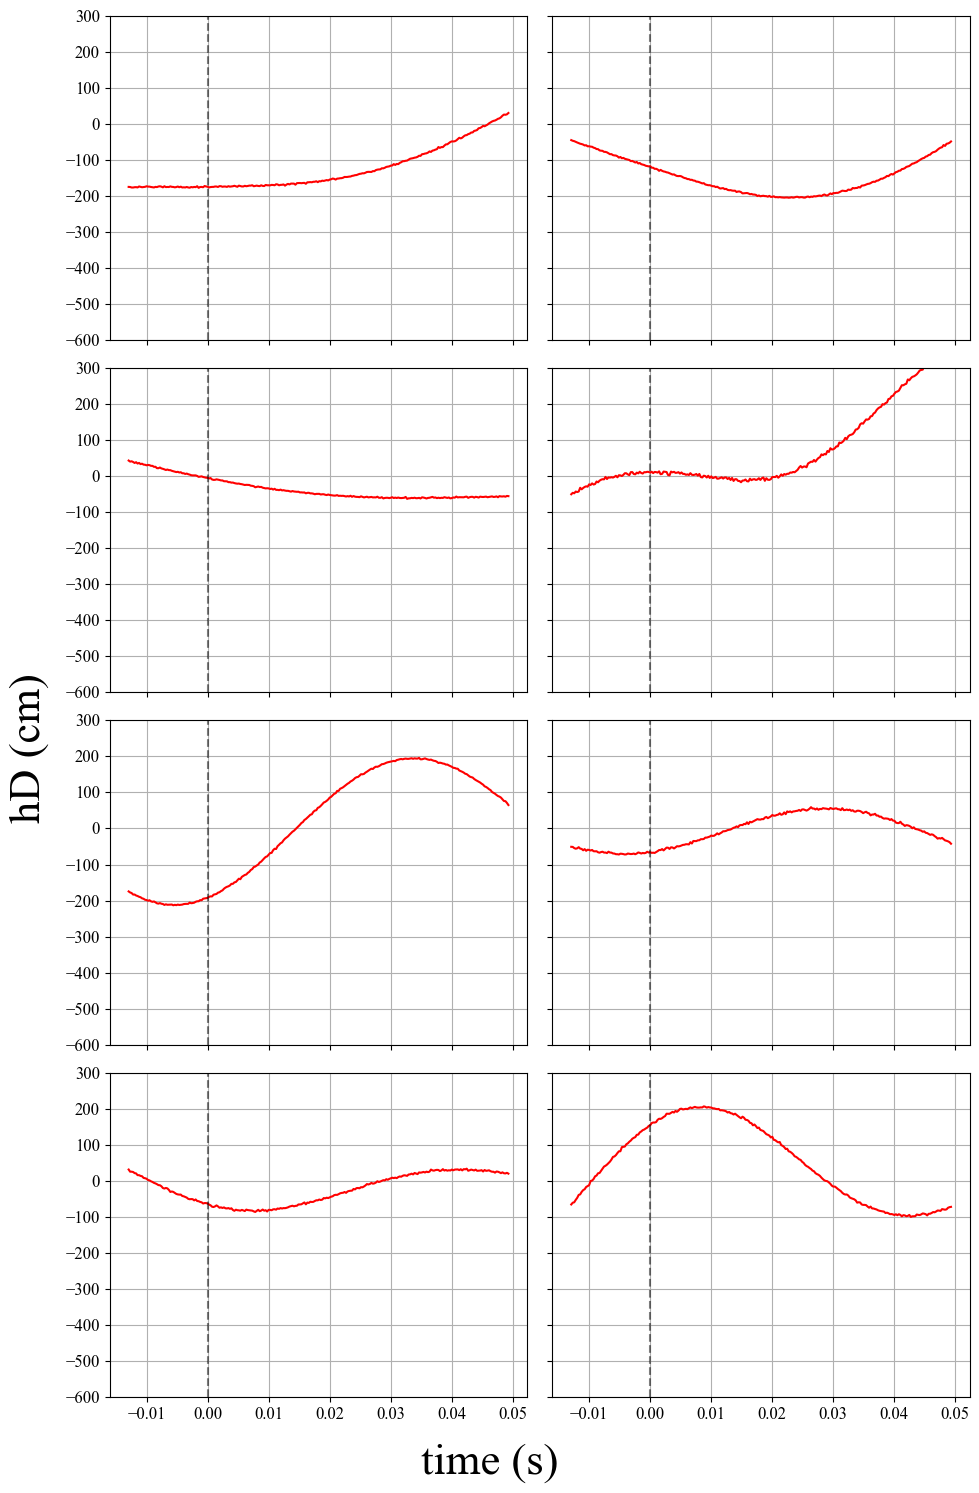

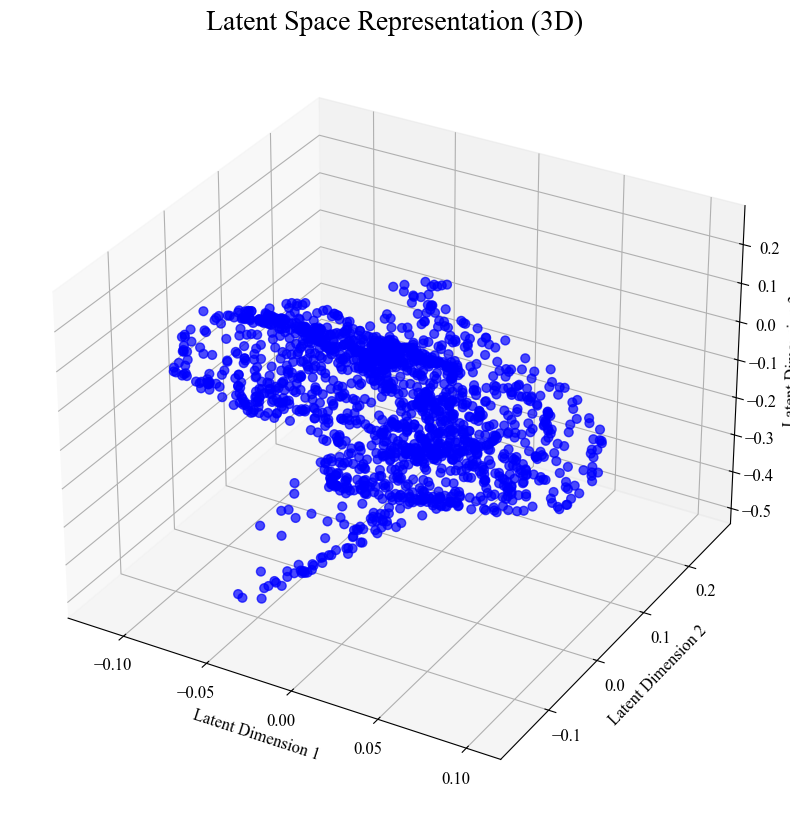

Epochs:  63%|██████▎   | 81/128 [00:49<00:30,  1.53it/s]

Epoch 81/128 | Train Loss: 44.3449 | Val Loss: 46.5383


Epochs:  64%|██████▍   | 82/128 [00:50<00:28,  1.61it/s]

Epoch 82/128 | Train Loss: 57.5326 | Val Loss: 112.6358


Epochs:  65%|██████▍   | 83/128 [00:51<00:26,  1.68it/s]

Epoch 83/128 | Train Loss: 75.1810 | Val Loss: 101.0308


Epochs:  66%|██████▌   | 84/128 [00:51<00:26,  1.66it/s]

Epoch 84/128 | Train Loss: 202.6999 | Val Loss: 356.1929


Epochs:  66%|██████▋   | 85/128 [00:52<00:24,  1.72it/s]

Epoch 85/128 | Train Loss: 107.8530 | Val Loss: 83.3320


Epochs:  67%|██████▋   | 86/128 [00:52<00:23,  1.77it/s]

Epoch 86/128 | Train Loss: 66.7355 | Val Loss: 57.4541


Epochs:  68%|██████▊   | 87/128 [00:53<00:22,  1.81it/s]

Epoch 87/128 | Train Loss: 43.2507 | Val Loss: 51.5609


Epochs:  69%|██████▉   | 88/128 [00:53<00:22,  1.80it/s]

Epoch 88/128 | Train Loss: 41.9966 | Val Loss: 40.1276


Epochs:  70%|██████▉   | 89/128 [00:54<00:21,  1.81it/s]

Epoch 89/128 | Train Loss: 42.1443 | Val Loss: 57.0467


Epochs:  70%|███████   | 90/128 [00:54<00:20,  1.82it/s]

Epoch 90/128 | Train Loss: 41.6840 | Val Loss: 49.1098


Epochs:  71%|███████   | 91/128 [00:55<00:20,  1.83it/s]

Epoch 91/128 | Train Loss: 48.6977 | Val Loss: 152.2624


Epochs:  72%|███████▏  | 92/128 [00:55<00:19,  1.84it/s]

Epoch 92/128 | Train Loss: 91.3375 | Val Loss: 83.7963


Epochs:  73%|███████▎  | 93/128 [00:56<00:19,  1.82it/s]

Epoch 93/128 | Train Loss: 52.2390 | Val Loss: 45.1872


Epochs:  73%|███████▎  | 94/128 [00:57<00:19,  1.76it/s]

Epoch 94/128 | Train Loss: 39.0912 | Val Loss: 40.0338


Epochs:  74%|███████▍  | 95/128 [00:57<00:19,  1.72it/s]

Epoch 95/128 | Train Loss: 33.3576 | Val Loss: 34.9301
Epoch 96/128 | Train Loss: 40.7003 | Val Loss: 63.6180


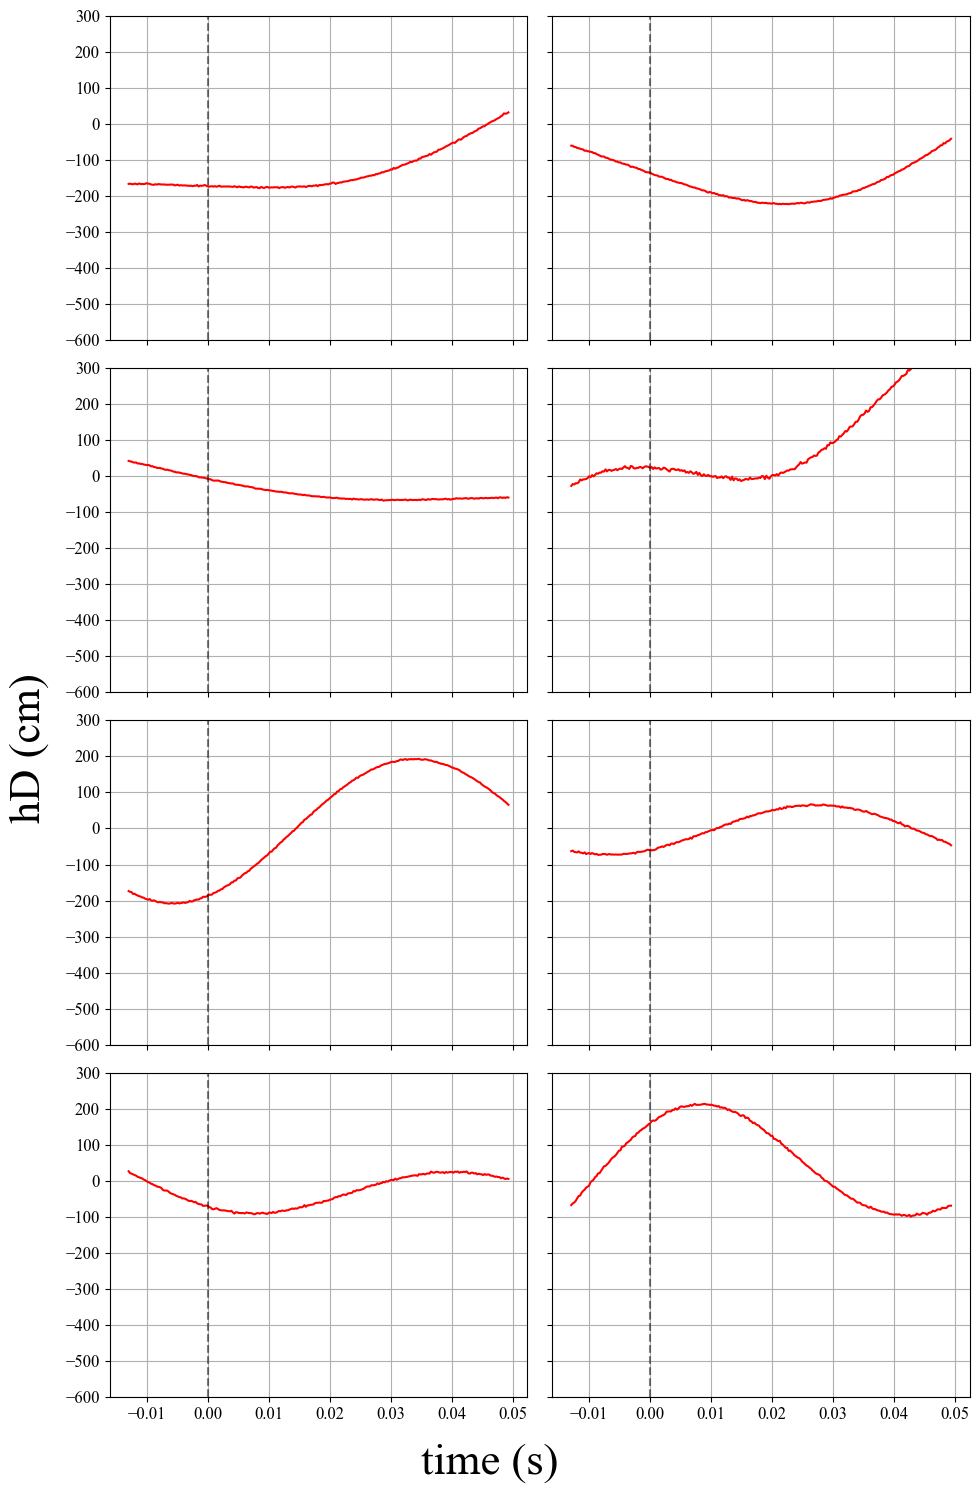

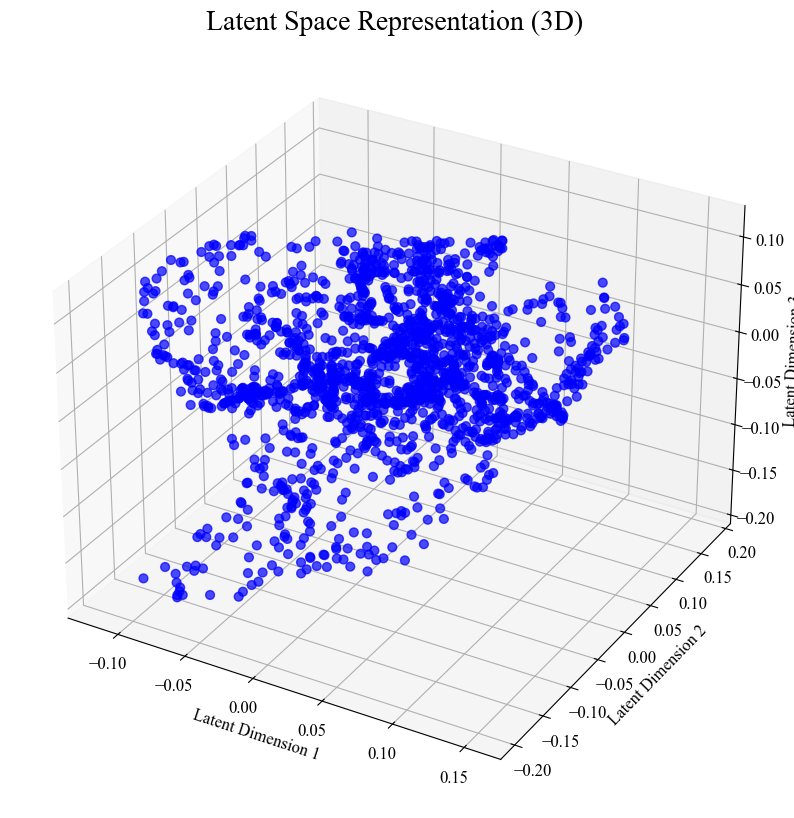

Epochs:  76%|███████▌  | 97/128 [00:59<00:21,  1.46it/s]

Epoch 97/128 | Train Loss: 57.8365 | Val Loss: 47.2957


Epochs:  77%|███████▋  | 98/128 [00:59<00:19,  1.55it/s]

Epoch 98/128 | Train Loss: 63.7052 | Val Loss: 84.3184


Epochs:  77%|███████▋  | 99/128 [01:00<00:18,  1.60it/s]

Epoch 99/128 | Train Loss: 75.8402 | Val Loss: 63.4341


Epochs:  78%|███████▊  | 100/128 [01:01<00:17,  1.61it/s]

Epoch 100/128 | Train Loss: 46.4919 | Val Loss: 42.7196


Epochs:  79%|███████▉  | 101/128 [01:01<00:16,  1.64it/s]

Epoch 101/128 | Train Loss: 57.3427 | Val Loss: 78.4491


Epochs:  80%|███████▉  | 102/128 [01:02<00:15,  1.63it/s]

Epoch 102/128 | Train Loss: 51.4112 | Val Loss: 40.0277


Epochs:  80%|████████  | 103/128 [01:03<00:15,  1.59it/s]

Epoch 103/128 | Train Loss: 53.0881 | Val Loss: 74.7341


Epochs:  81%|████████▏ | 104/128 [01:03<00:14,  1.61it/s]

Epoch 104/128 | Train Loss: 85.4281 | Val Loss: 111.5374


Epochs:  82%|████████▏ | 105/128 [01:04<00:14,  1.61it/s]

Epoch 105/128 | Train Loss: 74.4152 | Val Loss: 66.8486


Epochs:  83%|████████▎ | 106/128 [01:04<00:13,  1.61it/s]

Epoch 106/128 | Train Loss: 50.2531 | Val Loss: 38.4970


Epochs:  84%|████████▎ | 107/128 [01:05<00:13,  1.59it/s]

Epoch 107/128 | Train Loss: 35.1051 | Val Loss: 32.5072


Epochs:  84%|████████▍ | 108/128 [01:06<00:12,  1.66it/s]

Epoch 108/128 | Train Loss: 37.5987 | Val Loss: 38.7531


Epochs:  85%|████████▌ | 109/128 [01:06<00:11,  1.70it/s]

Epoch 109/128 | Train Loss: 41.0416 | Val Loss: 48.1738


Epochs:  86%|████████▌ | 110/128 [01:07<00:11,  1.60it/s]

Epoch 110/128 | Train Loss: 42.4188 | Val Loss: 39.1650


Epochs:  87%|████████▋ | 111/128 [01:07<00:10,  1.65it/s]

Epoch 111/128 | Train Loss: 44.0289 | Val Loss: 47.3658
Epoch 112/128 | Train Loss: 40.5407 | Val Loss: 32.9689


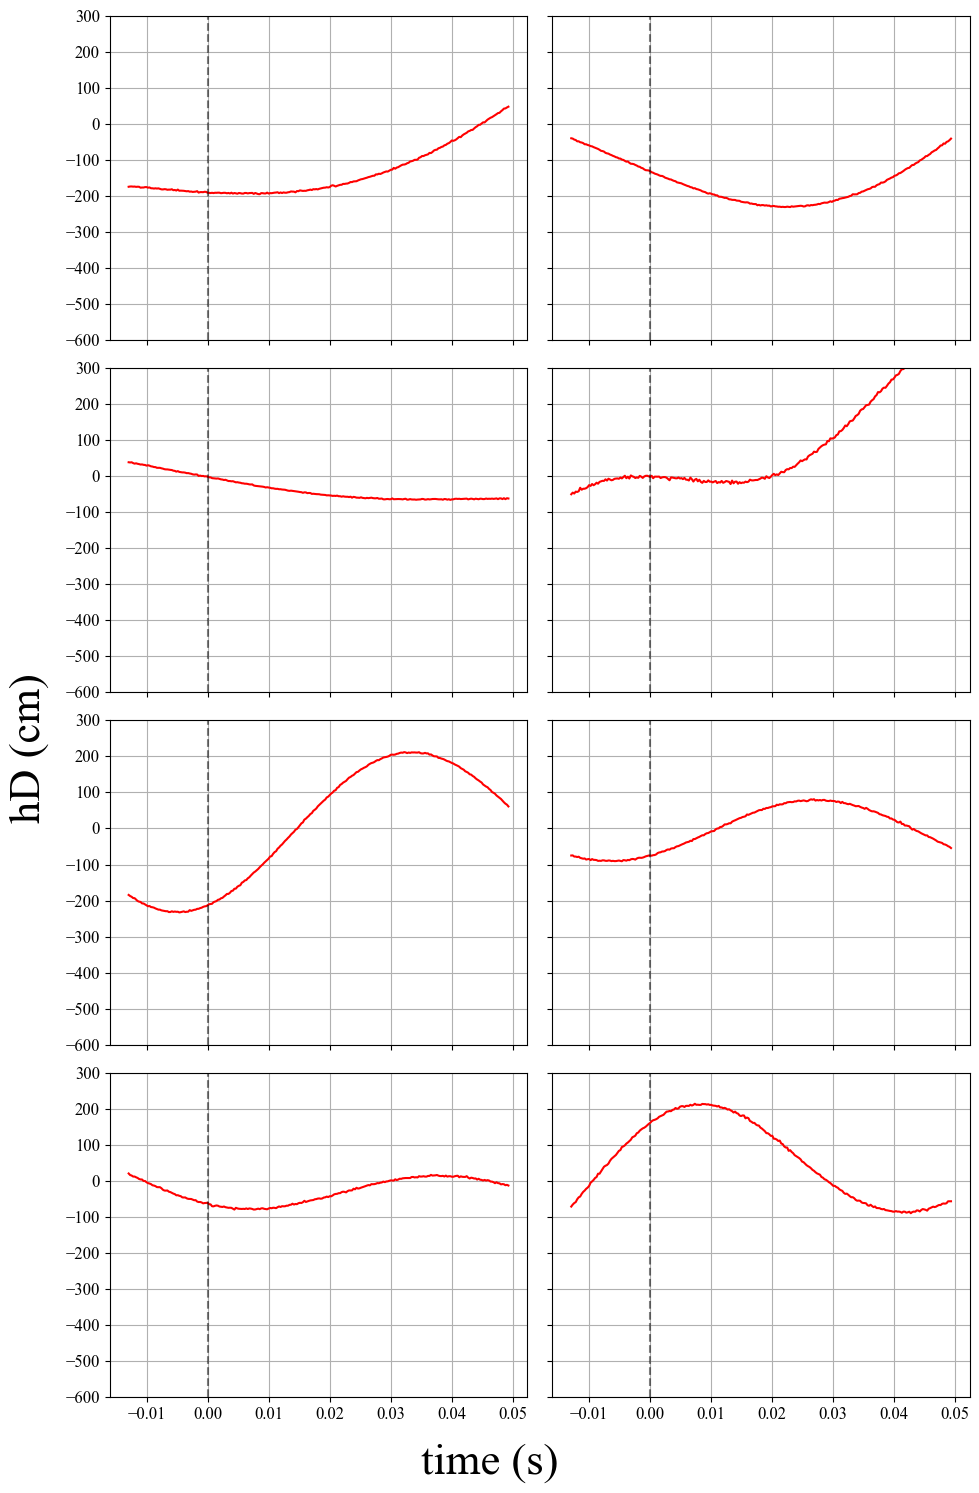

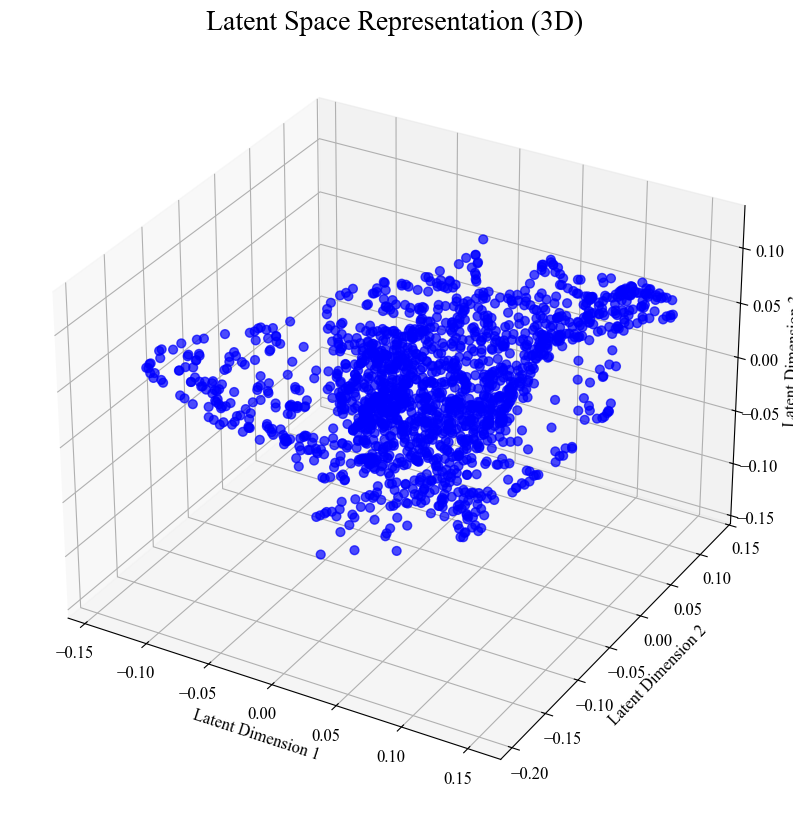

Epochs:  88%|████████▊ | 113/128 [01:09<00:10,  1.46it/s]

Epoch 113/128 | Train Loss: 69.5294 | Val Loss: 98.6155


Epochs:  89%|████████▉ | 114/128 [01:10<00:09,  1.55it/s]

Epoch 114/128 | Train Loss: 136.8200 | Val Loss: 146.5765


Epochs:  90%|████████▉ | 115/128 [01:10<00:08,  1.61it/s]

Epoch 115/128 | Train Loss: 65.5336 | Val Loss: 44.0554


Epochs:  91%|█████████ | 116/128 [01:11<00:07,  1.66it/s]

Epoch 116/128 | Train Loss: 38.7758 | Val Loss: 48.6519


Epochs:  91%|█████████▏| 117/128 [01:11<00:06,  1.71it/s]

Epoch 117/128 | Train Loss: 47.3466 | Val Loss: 59.9162


Epochs:  92%|█████████▏| 118/128 [01:12<00:05,  1.67it/s]

Epoch 118/128 | Train Loss: 44.6171 | Val Loss: 39.2539


Epochs:  93%|█████████▎| 119/128 [01:12<00:05,  1.73it/s]

Epoch 119/128 | Train Loss: 37.2545 | Val Loss: 38.0925


Epochs:  94%|█████████▍| 120/128 [01:13<00:04,  1.71it/s]

Epoch 120/128 | Train Loss: 37.4201 | Val Loss: 35.5163


Epochs:  95%|█████████▍| 121/128 [01:14<00:04,  1.71it/s]

Epoch 121/128 | Train Loss: 38.6035 | Val Loss: 36.8668


Epochs:  95%|█████████▌| 122/128 [01:14<00:03,  1.71it/s]

Epoch 122/128 | Train Loss: 39.8674 | Val Loss: 43.4232


Epochs:  96%|█████████▌| 123/128 [01:15<00:02,  1.74it/s]

Epoch 123/128 | Train Loss: 52.1683 | Val Loss: 62.2880


Epochs:  97%|█████████▋| 124/128 [01:15<00:02,  1.76it/s]

Epoch 124/128 | Train Loss: 58.1372 | Val Loss: 61.6401


Epochs:  98%|█████████▊| 125/128 [01:16<00:01,  1.79it/s]

Epoch 125/128 | Train Loss: 48.2560 | Val Loss: 53.9505


Epochs:  98%|█████████▊| 126/128 [01:16<00:01,  1.80it/s]

Epoch 126/128 | Train Loss: 54.8954 | Val Loss: 67.2495


Epochs:  99%|█████████▉| 127/128 [01:17<00:00,  1.82it/s]

Epoch 127/128 | Train Loss: 49.8092 | Val Loss: 38.3571
Epoch 128/128 | Train Loss: 45.4495 | Val Loss: 55.6577


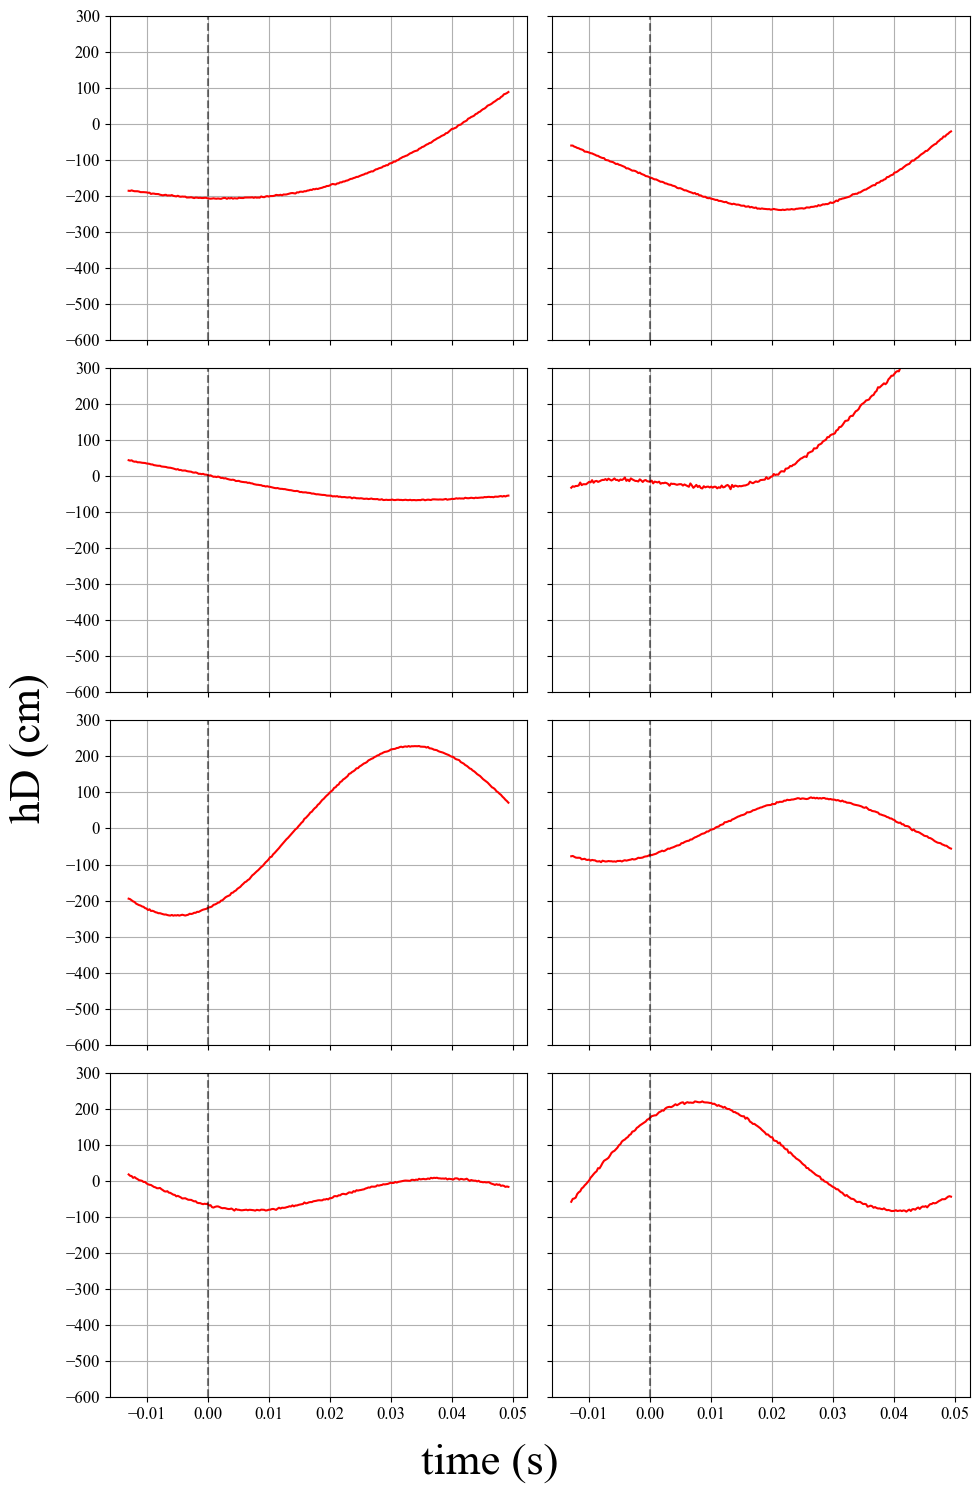

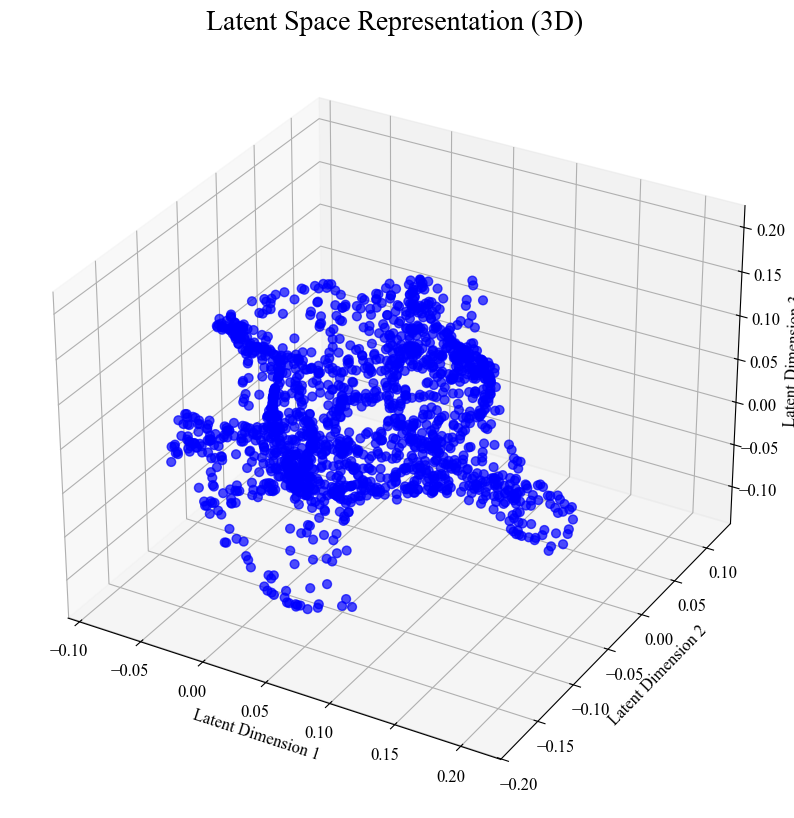

Epochs: 100%|██████████| 128/128 [01:18<00:00,  1.63it/s]

Training Time: 1.31min
Saved VAE model to outdir/generator_weights.pt


In [3]:
train_dataset = ToyData(num_signals=1684, signal_length=256)
validation_dataset = ToyData(num_signals=round(1684 * 0.1), signal_length=256)

toy = True
vae_trainer = Trainer(toy=toy)
vae_trainer.train()

### Train VAE, get MV Gaussian Latent Space. No conditioning on parameters

### Train Flow to go from MV Gaussian Latent Space to Parameter Space